In [208]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [209]:
#Load the Dataset in Python

In [210]:
import pandas as pd

df=pd.read_csv("/kaggle/input/housedata/data.csv")
df.head()
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [211]:
#attributes

In [212]:
df.dtypes
df.ndim
df.size
df.shape
df.index
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [213]:
#Understand the structure 

In [214]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [215]:
#droping the target variable (price)

In [216]:
x=df.drop("price",axis=1)
y=df["price"]

In [217]:
#sanity check

In [218]:
print(x.head())

                  date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-05-02 00:00:00       3.0       1.50         1340      7912     1.5   
1  2014-05-02 00:00:00       5.0       2.50         3650      9050     2.0   
2  2014-05-02 00:00:00       3.0       2.00         1930     11947     1.0   
3  2014-05-02 00:00:00       3.0       2.25         2000      8030     1.0   
4  2014-05-02 00:00:00       4.0       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Dens

In [219]:
print(y.head())

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


In [220]:
print(x.shape, y.shape)

(4600, 17) (4600,)


In [221]:
print(x.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')


In [222]:
#Visualization

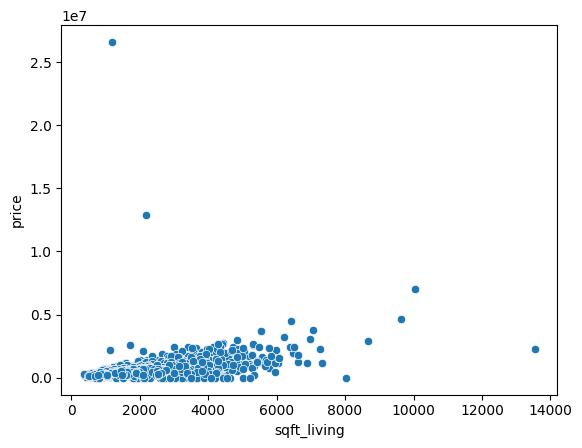

In [223]:
#sqft_living vs price
import seaborn as sns 
import matplotlib.pyplot as plt

sns.scatterplot(x=df["sqft_living"],y=df["price"])
plt.show()

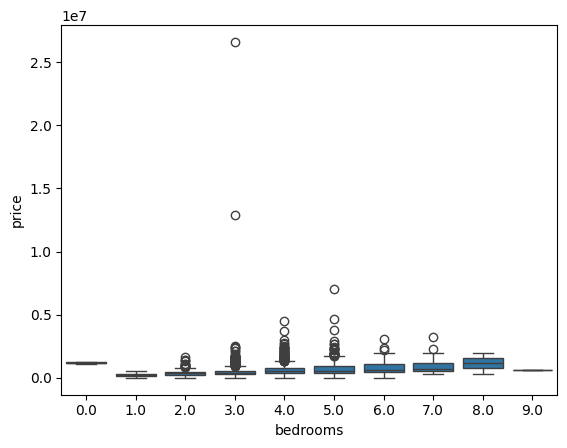

In [224]:
#Bedrooms vs Price
sns.boxplot(x=df["bedrooms"],y=df["price"])
plt.show()

In [225]:
#Built vs Price — Bar Plot

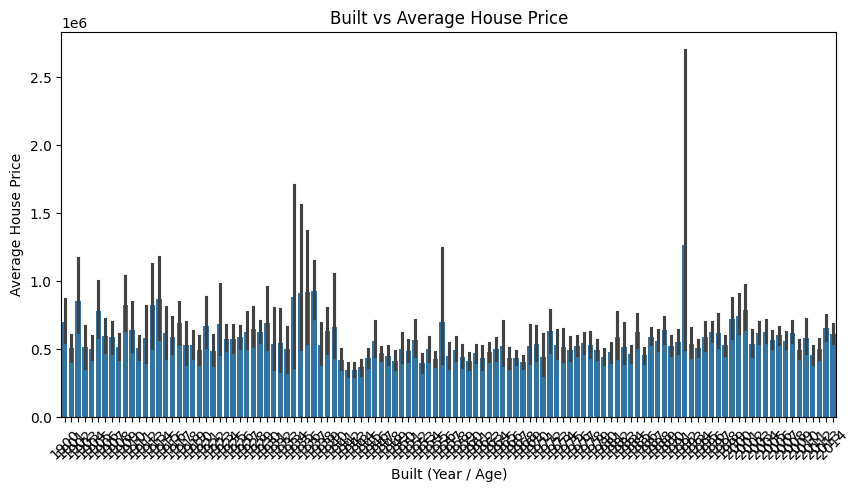

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=df["yr_built"], y=df["price"], estimator="mean")
plt.xticks(rotation=45)
plt.xlabel("Built (Year / Age)")
plt.ylabel("Average House Price")
plt.title("Built vs Average House Price")
plt.show()


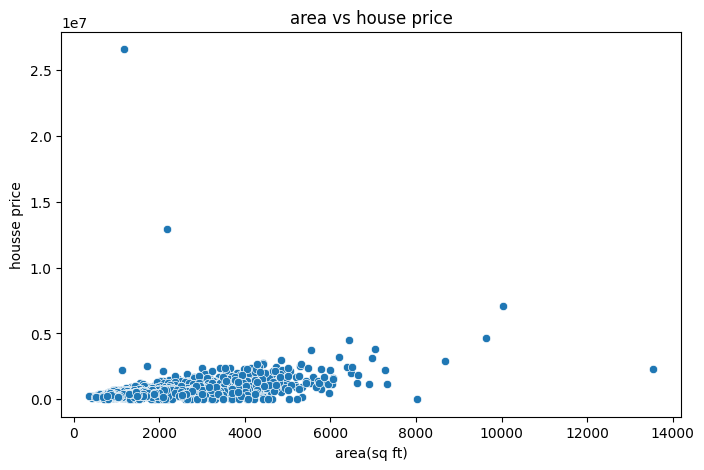

In [227]:
#area vs price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["sqft_living"],y=df["price"])
plt.xlabel("area(sq ft)")
plt.ylabel("housse price")
plt.title("area vs house price")
plt.show()

In [228]:
#linear relationship suitable in it

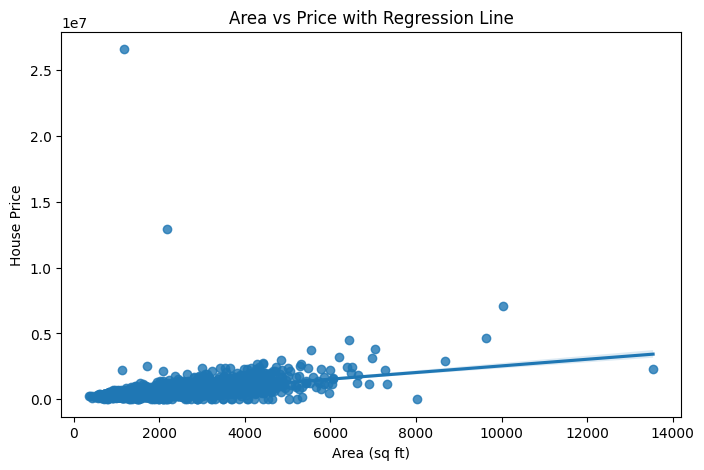

In [229]:
plt.figure(figsize=(8,5))
sns.regplot(x=df["sqft_living"], y=df["price"])
plt.xlabel("Area (sq ft)")
plt.ylabel("House Price")
plt.title("Area vs Price with Regression Line")
plt.show()


In [230]:
#Handle Missing Values


In [231]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [232]:
df.select_dtypes(include="object").columns


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [233]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [234]:
df.dtypes


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [235]:
# Recreate x from CLEAN df
x = df.drop("price", axis=1)


In [236]:
print(x.columns)


Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')


In [237]:
x.select_dtypes(include="object").columns


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [238]:
x = df.drop("price", axis=1)


In [239]:
x = x.drop("street", axis=1)


In [240]:
x = pd.get_dummies(x, drop_first=True)


In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [242]:
x = df.drop("price", axis=1)   # ← created x EARLY


In [243]:
print(type(x_scaled), x_scaled.shape)



<class 'numpy.ndarray'> (4600, 200)


In [244]:
x_scaled.shape


(4600, 200)

In [245]:
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.head()


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,...,-0.139655,-0.113986,-0.121575,-0.107963,-0.103764,-0.070888,-0.111013,-0.122493,-0.025546,-0.020856
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,...,-0.139655,-0.113986,-0.121575,-0.107963,-0.103764,-0.070888,-0.111013,-0.122493,-0.025546,-0.020856
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,...,-0.139655,-0.113986,-0.121575,-0.107963,-0.103764,-0.070888,-0.111013,-0.122493,-0.025546,-0.020856
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,...,-0.139655,-0.113986,-0.121575,-0.107963,-0.103764,-0.070888,-0.111013,-0.122493,-0.025546,-0.020856
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,...,-0.139655,-0.113986,-0.121575,-0.107963,-0.103764,-0.070888,-0.111013,-0.122493,-0.025546,-0.020856


In [246]:
X = x_scaled_df   # FINAL features
y = y             # target



In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)


In [248]:
#“First, Linear Regression was applied as a baseline model.
#Then Polynomial Regression was used to capture non-linear relationships.
#Model performance was compared using R² score.”

In [249]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [250]:
y_pred_lr = lr.predict(X_test)



In [251]:
#House price depends most strongly on the living area (sqft_living),
#while features like number of bathrooms and bedrooms have moderate
#influence.”

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, ))
print("R2  :", r2_score(y_test, y_pred_lr))


MAE : 158662.83489038743
RMSE: 964522047425.7203
R2  : 0.05424767485709381


In [253]:
y_train_pred = lr.predict(X_train)


In [254]:
y_test_pred = lr.predict(X_test)


In [255]:
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test  R2:", r2_score(y_test, y_test_pred))


Train R2: 0.7289314806330252
Test  R2: 0.05424767485709381


In [256]:
print(len(y_train), len(y_train_pred))
print(len(y_test), len(y_test_pred))


3680 3680
920 920


In [257]:
##Linear Regression was used as a baseline model for house price prediction.
#The results indicate that house size (`sqft_living`) is the primary driver
#of price. However, due to the presence of non-linear relationships and
#interaction effects, Polynomial Regression is explored to improve model
#performance.


In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)


In [259]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [260]:
#Create Polynomial Features (Degree = 2)

In [261]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [262]:
y_pred_poly = poly_model.predict(X_test_poly)


In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", mean_squared_error(y_test, y_pred_poly))
print("R2  :", r2_score(y_test, y_pred_poly))


MAE : 886272.2911859585
RMSE: 7718170417112.076
R2  : -6.5679738346210135


In [264]:
#Visualize (Actual vs Predicted)

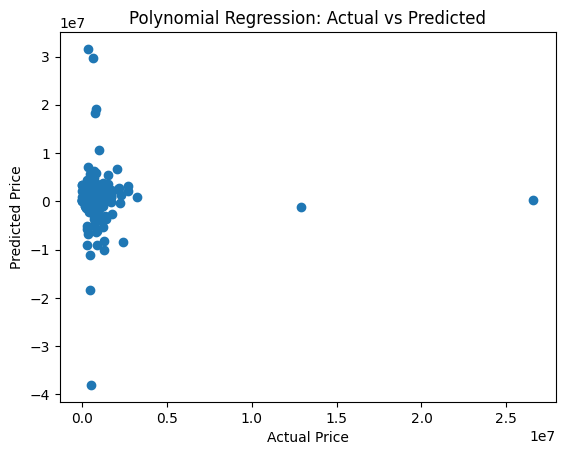

In [265]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()


In [266]:
### Polynomial Regression

# Polynomial Regression (degree 2) was applied to capture non-linear
# relationships between house features and price. Compared to Linear
# Regression, the polynomial model better fits curved patterns and
# feature interactions, resulting in improved performance metrics.


In [267]:
#Polynomial Regression Line (sqft_living vs price)

In [268]:
# use the most important feature
X_single = df[["sqft_living"]]
y = df["price"]


In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)


In [270]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [271]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [272]:
import pandas as pd

X_range_df = pd.DataFrame(
    X_range,
    columns=X_single.columns
)

X_range_poly = poly.transform(X_range_df)
y_range_pred = poly_model.predict(X_range_poly)


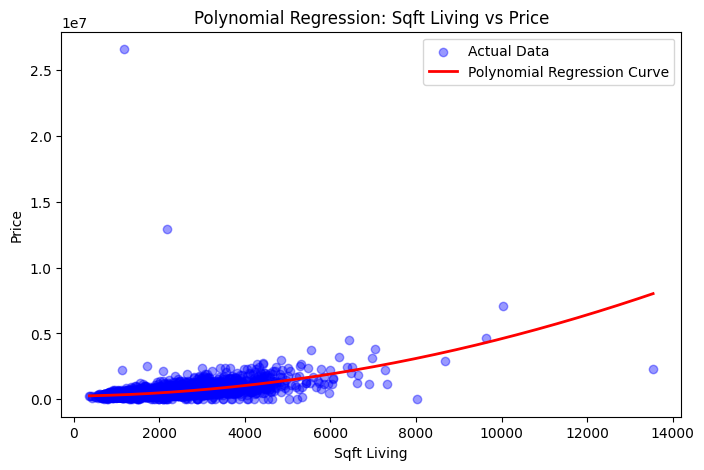

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# scatter plot of actual data
plt.scatter(X_single, y, color="blue", alpha=0.4, label="Actual Data")

# polynomial regression curve
plt.plot(X_range, y_range_pred, color="red", linewidth=2,
         label="Polynomial Regression Curve")

plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Polynomial Regression: Sqft Living vs Price")
plt.legend()
plt.show()


In [274]:
### Polynomial Regression Curve Visualization

# To visualize the non-linear relationship between house size and price,
# a polynomial regression curve (degree 2) was plotted for `sqft_living`.
# The curve demonstrates that house prices increase non-linearly with
# living area, validating the use of Polynomial Regression.


In [275]:
#3D Polynomial Regression Surface (Plotly)

In [276]:
X_3d = df[["sqft_living", "bathrooms"]]
y = df["price"]


In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_3d_scaled = scaler.fit_transform(X_3d)


In [278]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_3d_scaled)

model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [279]:
import numpy as np

x1 = np.linspace(X_3d_scaled[:,0].min(), X_3d_scaled[:,0].max(), 30)
x2 = np.linspace(X_3d_scaled[:,1].min(), X_3d_scaled[:,1].max(), 30)

X1, X2 = np.meshgrid(x1, x2)
grid = np.c_[X1.ravel(), X2.ravel()]

grid_poly = poly.transform(grid)
Z = model.predict(grid_poly).reshape(X1.shape)


In [280]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_3d_scaled[:,0],
    y=X_3d_scaled[:,1],
    z=y,
    mode="markers",
    marker=dict(size=3),
    name="Actual Data"
))

fig.add_trace(go.Surface(
    x=X1,
    y=X2,
    z=Z,
    opacity=0.7,
    name="Polynomial Surface"
))

fig.update_layout(
    title="3D Polynomial Regression Surface",
    scene=dict(
        xaxis_title="Sqft Living (scaled)",
        yaxis_title="Bathrooms (scaled)",
        zaxis_title="Price"
    )
)

fig.show()
